<a href="https://colab.research.google.com/github/aholloman79/A-Primer-on-Scientific-Programming-with-Python/blob/master/Boosting_eCommerce_Sales_Predictions_with_Bagging_and_Classification_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

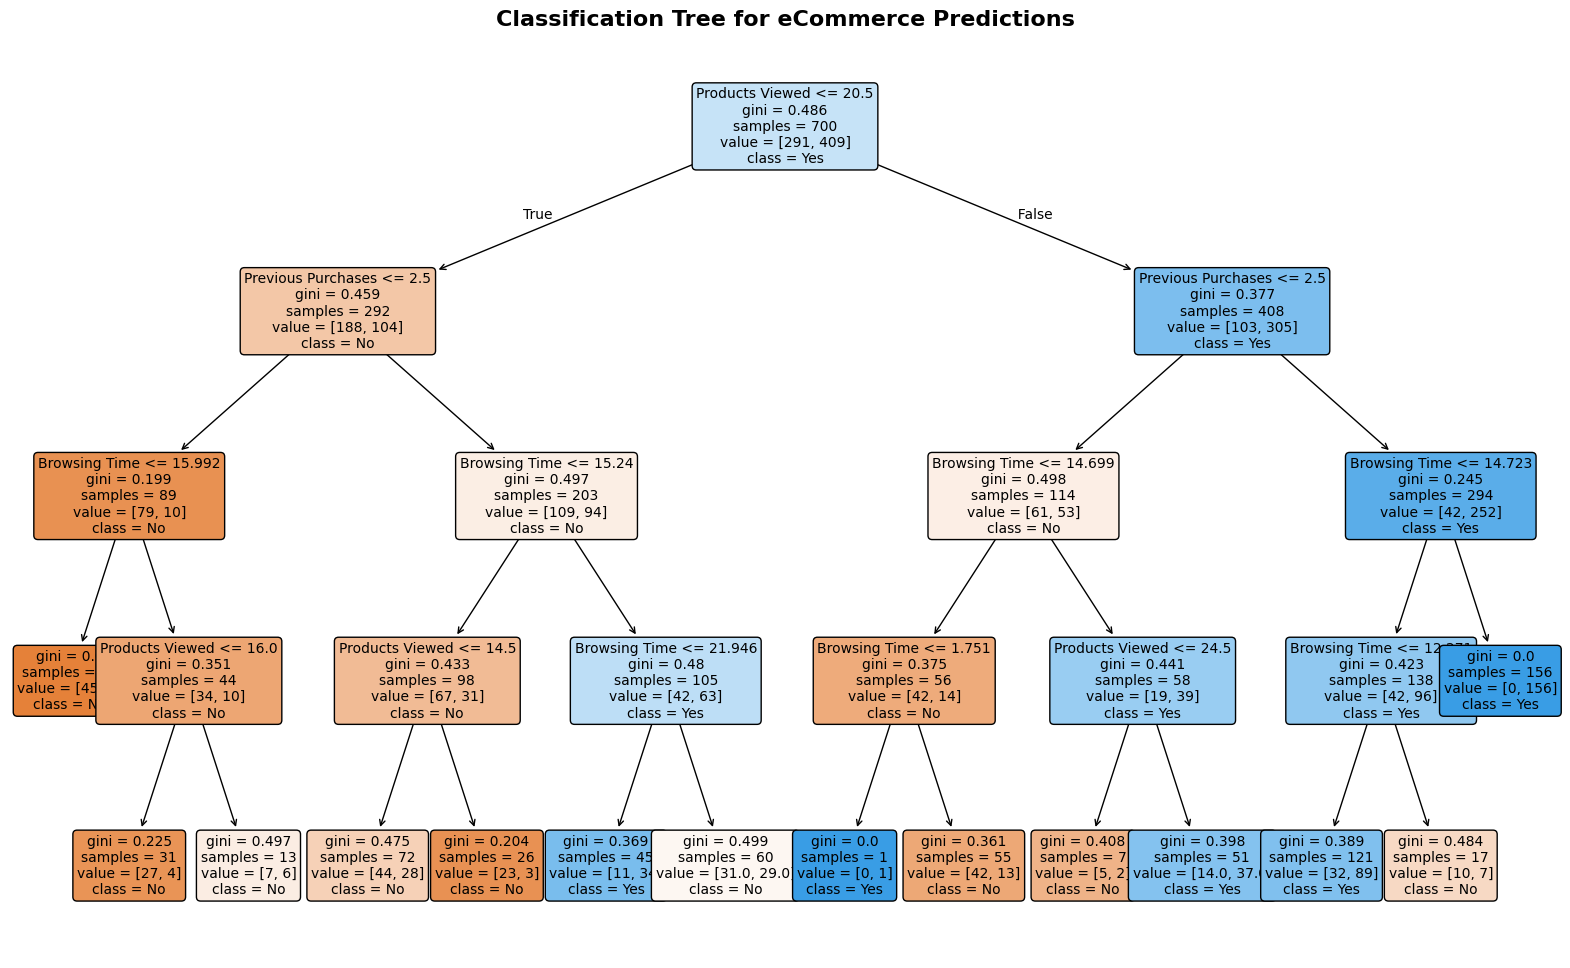

Classification Tree Performance:
[[ 90  26]
 [ 60 124]]
              precision    recall  f1-score   support

           0       0.60      0.78      0.68       116
           1       0.83      0.67      0.74       184

    accuracy                           0.71       300
   macro avg       0.71      0.72      0.71       300
weighted avg       0.74      0.71      0.72       300



TypeError: BaggingClassifier.__init__() got an unexpected keyword argument 'base_estimator'

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Step 1: Simulating eCommerce data for classification tasks
# I needed a synthetic dataset that captured customer behavior variables relevant to eCommerce.
# This included predictors like browsing time, number of products viewed, and previous purchase history.
np.random.seed(42)  # Setting a seed to ensure reproducibility.
n_samples = 1000

# Generating predictors
browsing_time = np.random.uniform(1, 30, n_samples)  # Time spent on the website (in minutes).
products_viewed = np.random.randint(1, 50, n_samples)  # Number of products viewed.
previous_purchases = np.random.randint(0, 10, n_samples)  # Previous purchase count.

# Generating a binary target variable: Purchase (Yes/No)
# I wanted a non-linear relationship between the predictors and the target variable.
purchase_probability = (
    0.3 * (browsing_time > 15) + 0.4 * (products_viewed > 20) + 0.3 * (previous_purchases > 2)
)
purchased = np.random.binomial(1, purchase_probability / purchase_probability.max(), n_samples)

# Organizing the data into a structured DataFrame
ecommerce_data = pd.DataFrame({
    "Browsing Time": browsing_time,
    "Products Viewed": products_viewed,
    "Previous Purchases": previous_purchases,
    "Purchased": purchased,
})

# Step 2: Splitting the data into training and testing sets
# I split the data into training and testing sets to evaluate model performance on unseen data.
X = ecommerce_data[["Browsing Time", "Products Viewed", "Previous Purchases"]]
y = ecommerce_data["Purchased"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Fitting a classification tree
# I used a DecisionTreeClassifier to build a classification tree that predicts whether a customer makes a purchase.
classification_tree = DecisionTreeClassifier(criterion="gini", max_depth=4, random_state=42)
classification_tree.fit(X_train, y_train)

# Visualizing the classification tree
# I visualized the tree to understand its structure and interpret the decision-making process.
plt.figure(figsize=(20, 12))
plot_tree(classification_tree, feature_names=X.columns, class_names=["No", "Yes"], filled=True, rounded=True, fontsize=10)
plt.title("Classification Tree for eCommerce Predictions", fontsize=16, fontweight="bold")
plt.show()

# Step 4: Evaluating the classification tree
# I evaluated the classification tree using confusion matrix and classification metrics to assess its predictive power.
y_pred_tree = classification_tree.predict(X_test)
print("Classification Tree Performance:")
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

# Interpretation:
# The classification tree provided insights into the predictors influencing customer purchases.
# However, its predictive performance was limited by its simplicity, highlighting the need for ensemble methods.

# Step 5: Fitting a bagging classifier
# I applied bagging to combine multiple classification trees, reducing variance and improving accuracy.
bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=4), n_estimators=50, random_state=42)
bagging_model.fit(X_train, y_train)

# Step 6: Evaluating the bagging classifier
# I evaluated the bagging model on the test data to compare its performance against the single tree.
y_pred_bagging = bagging_model.predict(X_test)
print("Bagging Classifier Performance:")
print(confusion_matrix(y_test, y_pred_bagging))
print(classification_report(y_test, y_pred_bagging))

# Visualizing feature importance
# Although bagging models do not provide direct feature importance, I approximated it by assessing the single tree.
plt.bar(X.columns, classification_tree.feature_importances_, color=['#FF6F61', '#6B5B95', '#88B04B'])
plt.title("Feature Importance in Classification Tree", fontsize=16, fontweight="bold")
plt.ylabel("Importance", fontsize=12)
plt.show()

# Final Interpretation:
# The classification tree offered clear interpretability and identified key predictors such as browsing time and products viewed.
# However, it struggled with generalization, as seen in the performance metrics.
# The bagging model significantly improved prediction accuracy by reducing variance, making it a superior choice for eCommerce sales predictions.
